In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("..\\data set\\spliting data\\train part_1.csv")
data_test= pd.read_csv("..\\data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("..\\data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [3]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-316.436707,43.278313,-17.432079,-12.136553,-31.646793,-43.343410,-29.433920,-7.395789,-8.296623,...,13.694933,10.776925,5.746318,-0.170380,-6.204309,-10.752931,-14.407853,-15.192730,-13.961675,-10.880321
1,fake,-313.715485,37.472008,-9.953055,-17.104858,-39.747383,-36.124401,-21.887249,-10.222238,-12.318073,...,15.583050,11.774418,6.419495,0.005218,-6.781600,-11.338203,-15.226476,-16.348417,-15.126612,-11.669314
2,fake,-292.899139,37.689743,-10.654116,-6.403421,-42.925159,-46.732063,-20.459311,-11.330639,-19.071028,...,17.686121,13.331574,7.578906,0.466600,-7.218859,-12.755402,-17.010296,-18.684978,-17.590227,-13.739594
3,fake,-322.497833,45.355591,-12.437693,-8.034644,-31.999758,-45.762901,-20.573393,-9.270329,-19.913452,...,12.371523,9.074281,4.545120,-1.179130,-7.010352,-10.788098,-14.311775,-15.234329,-13.837818,-10.515843
4,fake,-314.329773,59.011612,-23.366608,-18.438854,-40.265118,-37.516422,-15.872578,-11.545014,-18.276520,...,16.169527,11.860390,6.858548,0.002248,-7.386909,-11.768016,-15.950487,-17.028166,-15.078510,-11.678268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,fake,-325.415833,19.610830,-11.966273,-12.083563,-33.319363,-31.306738,-29.226498,-6.685308,-15.481282,...,12.172759,8.952480,4.530303,-0.863500,-6.196769,-9.932532,-12.975727,-14.011071,-12.705536,-9.703680
23574,fake,-328.514526,40.852905,-19.849552,-13.402417,-31.214626,-36.955322,-30.466259,-2.838494,-9.014296,...,12.651482,9.740194,5.123112,-0.451682,-6.335145,-10.242321,-13.578283,-14.230977,-13.284674,-10.254539
23575,fake,-308.229340,34.155842,-10.081802,-9.839477,-33.417625,-34.786259,-25.319830,-5.656969,-12.708363,...,14.574633,11.497999,6.407865,0.321235,-6.050430,-10.691472,-14.425829,-15.517880,-13.966942,-10.871419
23576,fake,-326.475006,40.162674,-32.599525,-8.254953,-26.918192,-36.201168,-28.113541,-17.086596,-14.391683,...,13.288797,9.724173,5.035305,-0.793635,-6.656776,-10.808673,-14.260748,-15.707395,-14.567255,-11.253422


# Encoding

In [4]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [5]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [6]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-316.436707,43.278313,-17.432079,-12.136553,-31.646793,-43.343410,-29.433920,-7.395789,-8.296623,...,13.694933,10.776925,5.746318,-0.170380,-6.204309,-10.752931,-14.407853,-15.192730,-13.961675,-10.880321
1,fake,-313.715485,37.472008,-9.953055,-17.104858,-39.747383,-36.124401,-21.887249,-10.222238,-12.318073,...,15.583050,11.774418,6.419495,0.005218,-6.781600,-11.338203,-15.226476,-16.348417,-15.126612,-11.669314
2,fake,-292.899139,37.689743,-10.654116,-6.403421,-42.925159,-46.732063,-20.459311,-11.330639,-19.071028,...,17.686121,13.331574,7.578906,0.466600,-7.218859,-12.755402,-17.010296,-18.684978,-17.590227,-13.739594
3,fake,-322.497833,45.355591,-12.437693,-8.034644,-31.999758,-45.762901,-20.573393,-9.270329,-19.913452,...,12.371523,9.074281,4.545120,-1.179130,-7.010352,-10.788098,-14.311775,-15.234329,-13.837818,-10.515843
4,fake,-314.329773,59.011612,-23.366608,-18.438854,-40.265118,-37.516422,-15.872578,-11.545014,-18.276520,...,16.169527,11.860390,6.858548,0.002248,-7.386909,-11.768016,-15.950487,-17.028166,-15.078510,-11.678268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,fake,-325.415833,19.610830,-11.966273,-12.083563,-33.319363,-31.306738,-29.226498,-6.685308,-15.481282,...,12.172759,8.952480,4.530303,-0.863500,-6.196769,-9.932532,-12.975727,-14.011071,-12.705536,-9.703680
23574,fake,-328.514526,40.852905,-19.849552,-13.402417,-31.214626,-36.955322,-30.466259,-2.838494,-9.014296,...,12.651482,9.740194,5.123112,-0.451682,-6.335145,-10.242321,-13.578283,-14.230977,-13.284674,-10.254539
23575,fake,-308.229340,34.155842,-10.081802,-9.839477,-33.417625,-34.786259,-25.319830,-5.656969,-12.708363,...,14.574633,11.497999,6.407865,0.321235,-6.050430,-10.691472,-14.425829,-15.517880,-13.966942,-10.871419
23576,fake,-326.475006,40.162674,-32.599525,-8.254953,-26.918192,-36.201168,-28.113541,-17.086596,-14.391683,...,13.288797,9.724173,5.035305,-0.793635,-6.656776,-10.808673,-14.260748,-15.707395,-14.567255,-11.253422


In [7]:
count = data_train['label'].value_counts()
print(count)


fake    21482
real     2096
Name: label, dtype: int64


In [8]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [9]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [10]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
23573,1,0
23574,1,0
23575,1,0
23576,1,0


In [11]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 74,946
Trainable params: 74,946
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
369/369 [==============================] - 14s 30ms/step - loss: 0.3005 - accuracy: 0.9093 - val_loss: 0.2945 - val_accuracy: 0.9111
Epoch 2/100
369/369 [==============================] - 11s 30ms/step - loss: 0.2913 - accuracy: 0.9111 - val_loss: 0.2910 - val_accuracy: 0.9111
Epoch 3/100
369/369 [=====

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 8s - loss: 0.1487 - accuracy: 0.9632 - 8s/epoch - 18ms/step
Test Accuracy: 96.32%


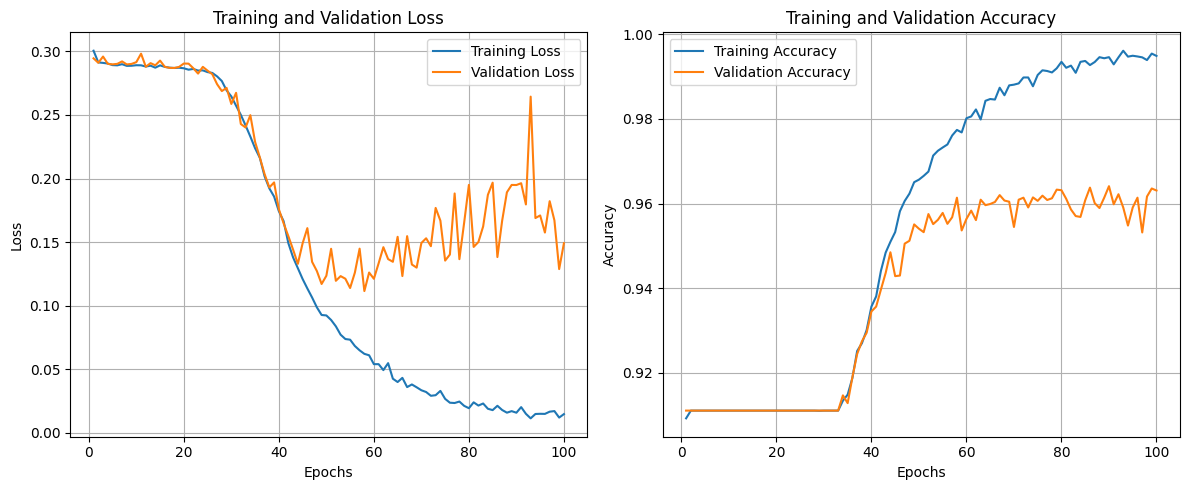

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 7s 15ms/step


In [15]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,0,1
14732,1,0
14733,1,0
14734,1,0


In [16]:
y_ture=np.argmax(y_test.values, axis=1)


In [17]:
y_ture

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 78.25%


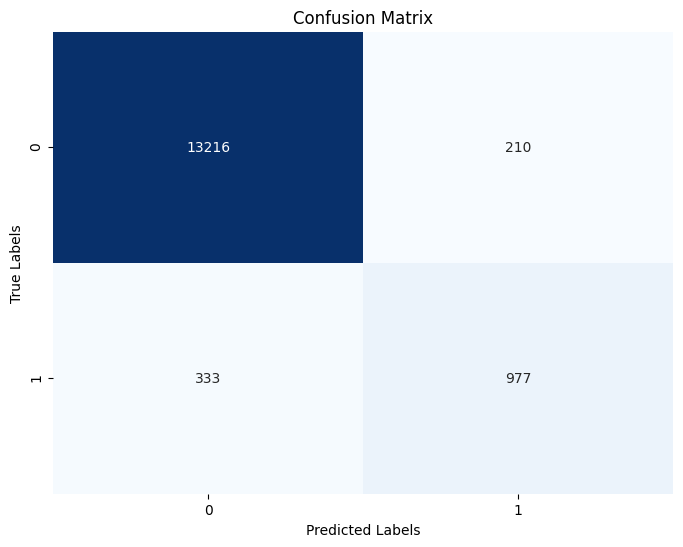

In [18]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,0,1
14732,1,0
14733,1,0
14734,1,0


# part 2

In [21]:
data_train_2 = pd.read_csv("..\\data set\\spliting data\\train part_2.csv")
data_train_2 = data_train.sample(frac=1).reset_index(drop=True)
# data_train['label']=label_encoder.transform(data_train['label'])

In [22]:

data_train=pd.concat([data_train, data_train_2], axis=0)


In [23]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-316.436707,43.278313,-17.432079,-12.136553,-31.646793,-43.343410,-29.433920,-7.395789,-8.296623,...,13.694933,10.776925,5.746318,-0.170380,-6.204309,-10.752931,-14.407853,-15.192730,-13.961675,-10.880321
1,fake,-313.715485,37.472008,-9.953055,-17.104858,-39.747383,-36.124401,-21.887249,-10.222238,-12.318073,...,15.583050,11.774418,6.419495,0.005218,-6.781600,-11.338203,-15.226476,-16.348417,-15.126612,-11.669314
2,fake,-292.899139,37.689743,-10.654116,-6.403421,-42.925159,-46.732063,-20.459311,-11.330639,-19.071028,...,17.686121,13.331574,7.578906,0.466600,-7.218859,-12.755402,-17.010296,-18.684978,-17.590227,-13.739594
3,fake,-322.497833,45.355591,-12.437693,-8.034644,-31.999758,-45.762901,-20.573393,-9.270329,-19.913452,...,12.371523,9.074281,4.545120,-1.179130,-7.010352,-10.788098,-14.311775,-15.234329,-13.837818,-10.515843
4,fake,-314.329773,59.011612,-23.366608,-18.438854,-40.265118,-37.516422,-15.872578,-11.545014,-18.276520,...,16.169527,11.860390,6.858548,0.002248,-7.386909,-11.768016,-15.950487,-17.028166,-15.078510,-11.678268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,real,-317.809052,55.511127,-24.223379,-7.221600,-31.051931,-33.822739,-22.319111,-20.855362,-14.433490,...,13.942616,10.706396,5.800991,-0.048992,-6.532174,-11.281973,-15.166049,-16.407270,-15.146466,-11.745183
23574,real,-266.940613,55.547302,-18.508469,-25.378624,-33.784676,-40.287071,-27.488798,-15.085394,-26.741850,...,15.474328,11.006373,5.571822,-1.392947,-8.484175,-13.054289,-16.757011,-17.936081,-15.970970,-12.571796
23575,fake,-307.774811,55.372688,-27.191936,-15.496869,-30.713804,-40.239155,-17.349848,-15.492396,-14.368451,...,15.836573,12.189288,6.747156,0.277923,-6.740340,-11.553890,-15.377613,-16.551247,-15.146432,-11.914554
23576,fake,-331.931946,58.680908,-22.948952,-18.650490,-34.089931,-37.591915,-27.377966,-11.468250,-13.988347,...,14.021746,10.429153,5.636807,-0.716680,-6.978161,-11.198618,-14.834987,-16.172306,-14.942417,-11.810020


In [24]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

y_train = pd.get_dummies(y_train)
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 74,946
Trainable params: 74,946
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
737/737 [==============================] - 52s 68ms/step - loss: 0.2943 - accuracy: 0.9111 - val_loss: 0.2902 - val_accuracy: 0.9111
Epoch 2/100
737/737 [==============================] - 47s 64ms/step - loss: 0.2898 - accuracy: 0.9111 - val_loss: 0.2898 - val_accuracy: 0.9111
Epoch 3/100
737/737 [===

In [25]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 8s - loss: 0.1278 - accuracy: 0.9729 - 8s/epoch - 17ms/step
Test Accuracy: 97.29%


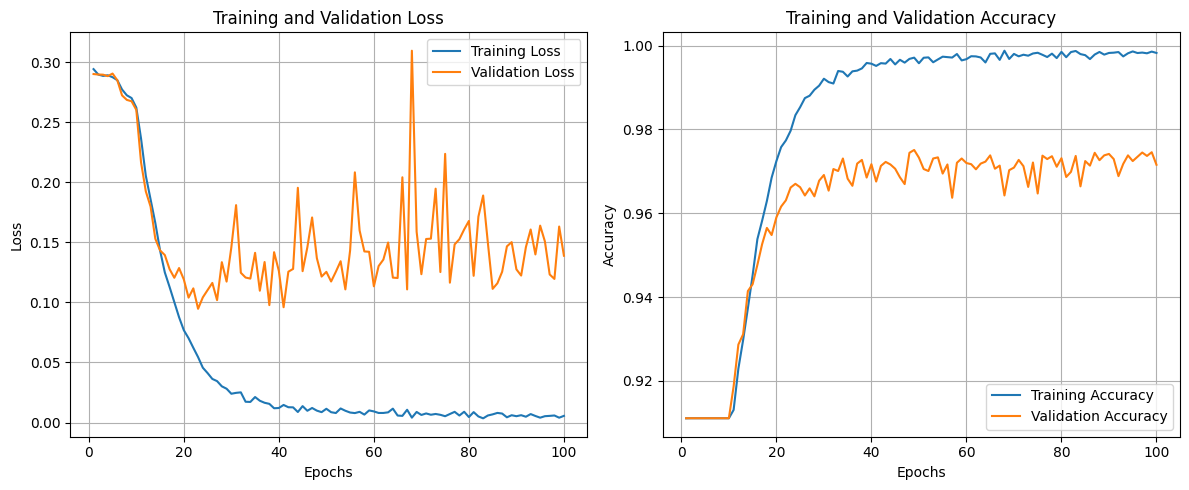

In [26]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 7s 15ms/step
Test f1_score : 83.81%


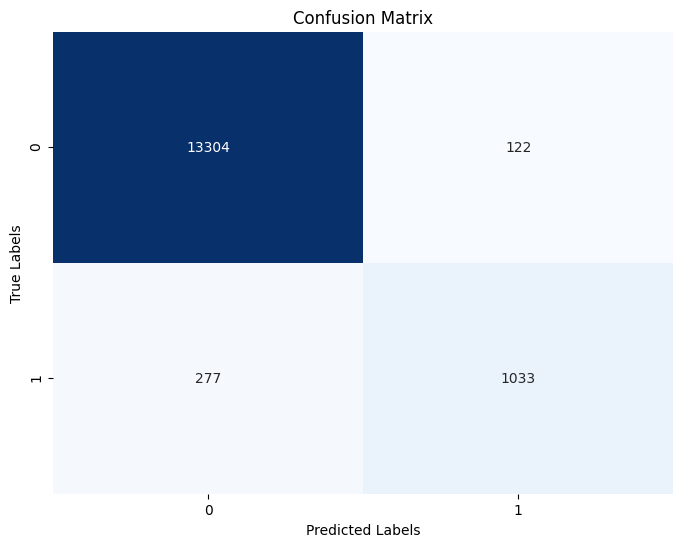

In [27]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 3

In [28]:
data_train_3 = pd.read_csv("..\\data set\\spliting data\\train part_3.csv")
data_train_3= data_train.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_3], axis=0)


In [29]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-316.436707,43.278313,-17.432079,-12.136553,-31.646793,-43.343410,-29.433920,-7.395789,-8.296623,...,13.694933,10.776925,5.746318,-0.170380,-6.204309,-10.752931,-14.407853,-15.192730,-13.961675,-10.880321
1,fake,-313.715485,37.472008,-9.953055,-17.104858,-39.747383,-36.124401,-21.887249,-10.222238,-12.318073,...,15.583050,11.774418,6.419495,0.005218,-6.781600,-11.338203,-15.226476,-16.348417,-15.126612,-11.669314
2,fake,-292.899139,37.689743,-10.654116,-6.403421,-42.925159,-46.732063,-20.459311,-11.330639,-19.071028,...,17.686121,13.331574,7.578906,0.466600,-7.218859,-12.755402,-17.010296,-18.684978,-17.590227,-13.739594
3,fake,-322.497833,45.355591,-12.437693,-8.034644,-31.999758,-45.762901,-20.573393,-9.270329,-19.913452,...,12.371523,9.074281,4.545120,-1.179130,-7.010352,-10.788098,-14.311775,-15.234329,-13.837818,-10.515843
4,fake,-314.329773,59.011612,-23.366608,-18.438854,-40.265118,-37.516422,-15.872578,-11.545014,-18.276520,...,16.169527,11.860390,6.858548,0.002248,-7.386909,-11.768016,-15.950487,-17.028166,-15.078510,-11.678268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47151,fake,-355.685120,45.427700,2.662572,3.312024,-42.277416,-45.340710,-26.009239,-11.602599,-14.558136,...,16.045149,12.574396,6.995233,0.258484,-6.743275,-11.771795,-15.508716,-16.831852,-15.294991,-11.965477
47152,fake,-299.977173,36.641422,-20.072828,-13.072999,-40.823086,-41.793224,-23.492010,-12.409232,-10.830588,...,13.513834,10.180088,4.936869,-0.941548,-7.359696,-11.450304,-14.710825,-15.960794,-14.463982,-11.177052
47153,fake,-316.183868,23.431320,-5.232475,-4.440228,-37.782124,-37.554073,-21.761646,-10.170853,-14.755135,...,15.404494,11.913920,6.806698,0.475295,-6.244978,-11.153260,-15.197936,-16.306070,-14.987393,-11.668864
47154,real,-291.062714,51.168625,-22.798773,-14.300347,-35.530853,-37.603745,-12.155568,-21.951105,-23.673399,...,13.989754,10.832738,5.652505,-0.583527,-7.110428,-11.383258,-15.085300,-16.062075,-14.677723,-11.504282


In [30]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Train the model



model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 74,946
Trainable params: 74,946
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1474/1474 [==============================] - 25s 16ms/step - loss: 0.2935 - accuracy: 0.9111 - val_loss: 0.2898 - val_accuracy: 0.9111
Epoch 2/100
1474/1474 [==============================] - 23s 15ms/step - loss: 0.2891 - accuracy: 0.9111 - val_loss: 0.2914 - val_accuracy: 0.9111
Epoch 3/100
1474/147

In [31]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.4477 - accuracy: 0.9748 - 2s/epoch - 4ms/step
Test Accuracy: 97.48%


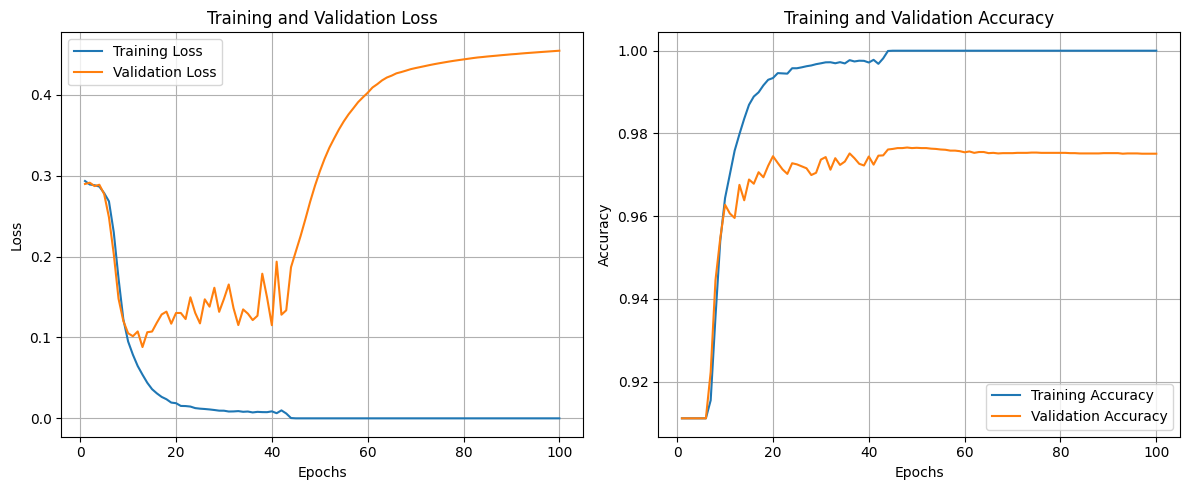

In [32]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 3ms/step
Test f1_score : 85.41%


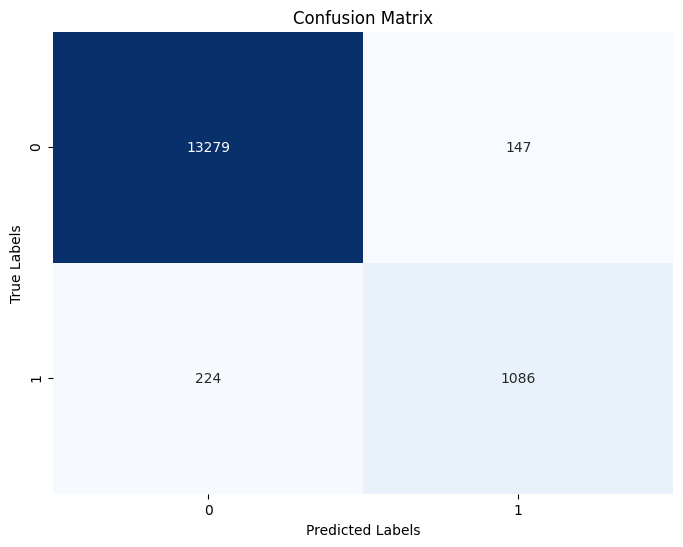

In [33]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 4

In [34]:
data_train_4 = pd.read_csv("..\\data set\\spliting data\\train part_4.csv")
data_train_4= data_train.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_4], axis=0)

#data_train['label']=label_encoder.transform(data_train['label'])

In [35]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

y_train = pd.get_dummies(y_train)
# Train the model


model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 74,946
Trainable params: 74,946
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2948/2948 [==============================] - 92s 31ms/step - loss: 0.2919 - accuracy: 0.9106 - val_loss: 0.2894 - val_accuracy: 0.9111
Epoch 2/100
2948/2948 [==============================] - 91s 31ms/step - loss: 0.2874 - accuracy: 0.9111 - val_loss: 0.2897 - val_accuracy: 0.9111
Epoch 3/100
2948/294

In [36]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 3s - loss: 0.4998 - accuracy: 0.9733 - 3s/epoch - 7ms/step
Test Accuracy: 97.33%


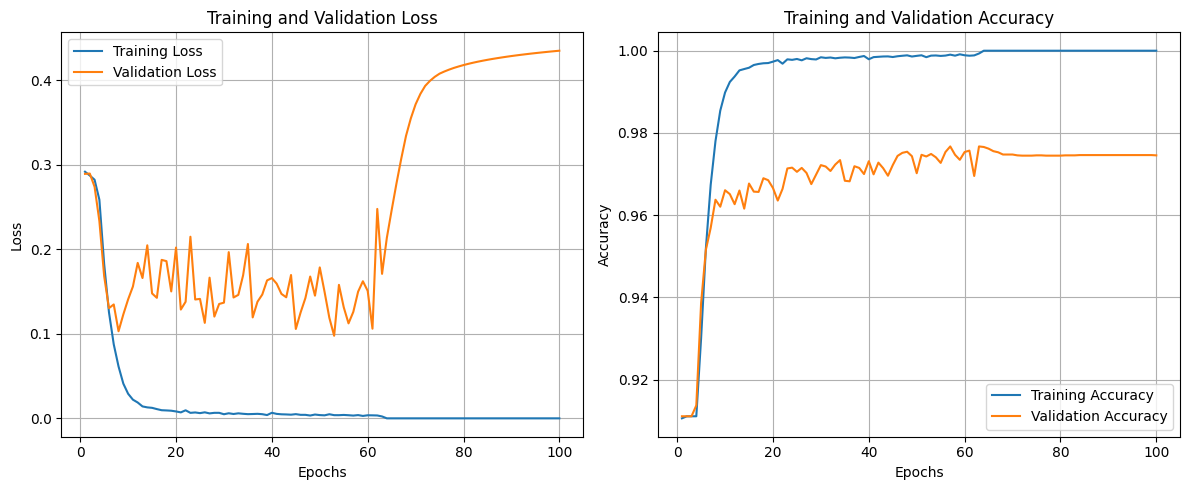

In [37]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 3s 6ms/step
Test f1_score : 83.56%


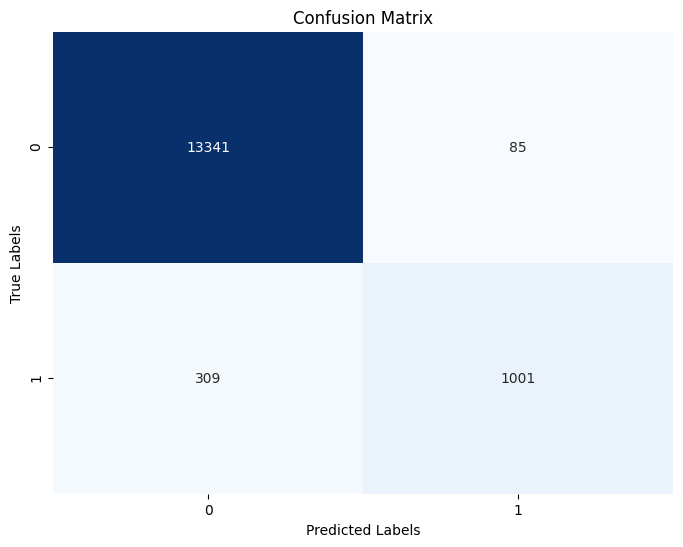

In [38]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 5

In [39]:
data_train_5= pd.read_csv("..\\data set\\spliting data\\train part_5.csv")
data_train_5= data_train.sample(frac=1).reset_index(drop=True)
#data_train['label']=label_encoder.transform(data_train['label'])
data_train=pd.concat([data_train, data_train_5], axis=0)

In [40]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = pd.get_dummies(y_train)
# Train the model

model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 74,946
Trainable params: 74,946
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5895/5895 [==============================] - 124s 21ms/step - loss: 0.2885 - accuracy: 0.9111 - val_loss: 0.2746 - val_accuracy: 0.9111
Epoch 2/100
5895/5895 [==============================] - 122s 21ms/step - loss: 0.1780 - accuracy: 0.9349 - val_loss: 0.1181 - val_accuracy: 0.9573
Epoch 3/100
5895/5

In [41]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 3s - loss: 0.4943 - accuracy: 0.9735 - 3s/epoch - 6ms/step
Test Accuracy: 97.35%


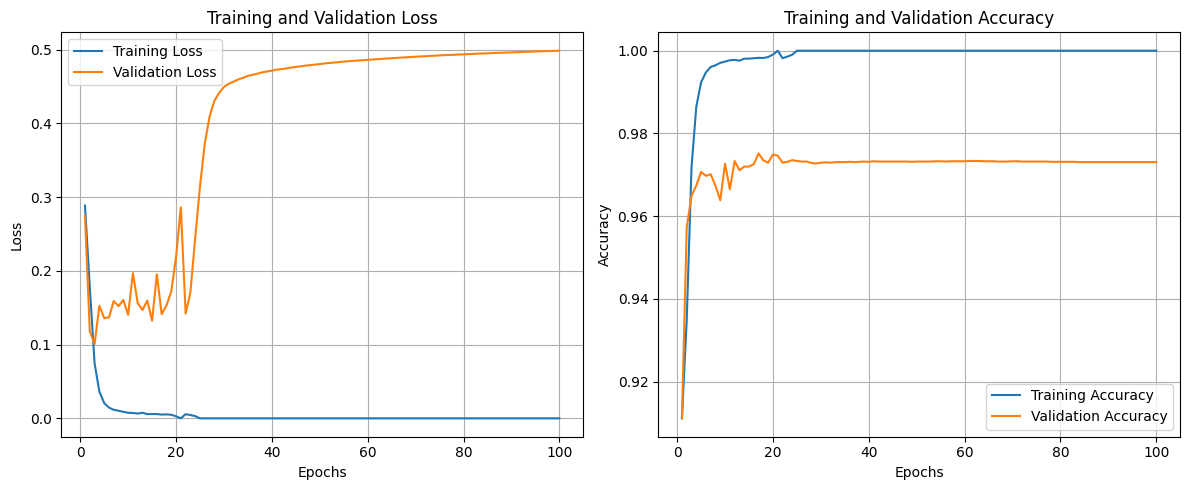

In [42]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 3s 5ms/step
Test f1_score : 84.04%


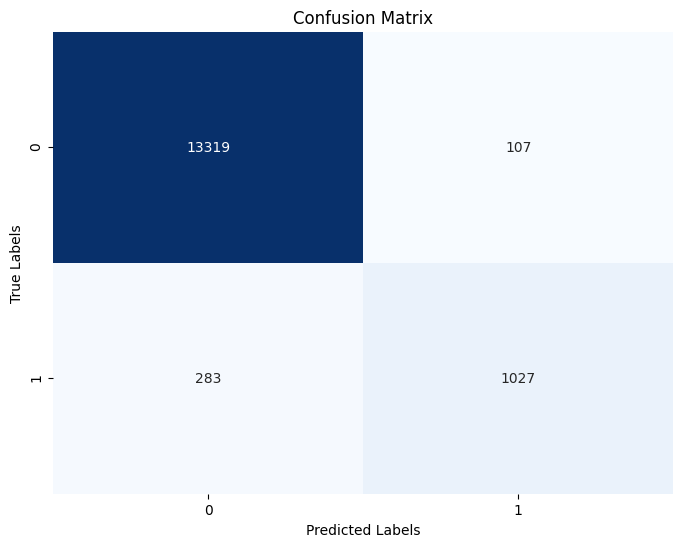

In [43]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#################################################################

In [44]:
import joblib


In [45]:
joblib.dump(model, 'ljspeech_full_band_melgan.pkl')

INFO:tensorflow:Assets written to: ram://f302dbfc-ce20-41a0-9aed-1028044e6ef9/assets


INFO:tensorflow:Assets written to: ram://f302dbfc-ce20-41a0-9aed-1028044e6ef9/assets


['ljspeech_full_band_melgan.pkl']

In [46]:
#build the model
model.save('ljspeech_full_band_melgan.h5')
#to call the model
#New_Model = tf.keras.models.load_model('my_model.h5')